# Cluster Analysis in Python by Ninh Nguyen

In [1]:
#import packages

import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
import seaborn as sns
from scipy.cluster.vq import whiten
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.vq import kmeans, vq
from numpy import random


In [2]:
# read the data
fifa_18 = pd.read_csv('fifa_18_sample_data.csv')
fifa_18


,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,194644,Montoya,Martín Montoya Torralbo,Valencia CF,https://cdn.sofifa.org/18/teams/461.png,2040,26,Spanish Primera División,1991-04-14,175.0,...,False,True,False,False,False,False,False,False,False,False
996,160087,L. Dalsaro,Lucas Dalsaro,Colo-Colo,https://cdn.sofifa.org/18/teams/110980.png,2009,25,Chilian Primera División,1992-02-29,187.0,...,False,False,False,False,False,False,False,False,False,False
997,31831,K. Källström,Kim Källström,Djurgårdens IF,https://cdn.sofifa.org/18/teams/710.png,2005,34,Swedish Allsvenskan,1982-08-24,185.0,...,False,False,False,False,False,False,False,False,False,False
998,204120,T. Vaclík,Tomáš Vaclík,FC Basel,https://cdn.sofifa.org/18/teams/896.png,1206,28,Swiss Super League,1989-03-29,188.0,...,False,False,False,False,False,False,False,False,False,True


In [3]:
# define x and y variables
x = fifa_18['age']
y = fifa_18['eur_wage']


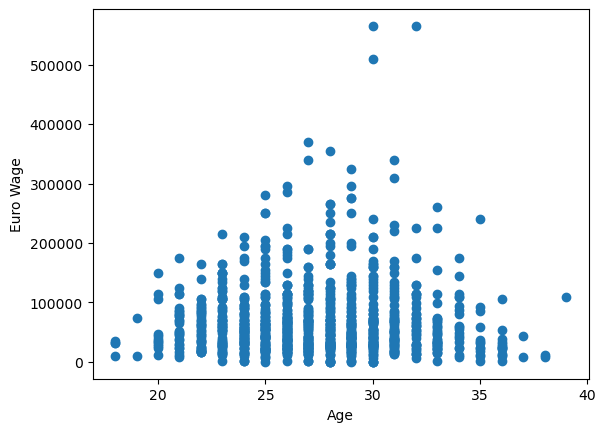

In [4]:
# Create a scatter plot
plt.scatter(x, y)
plt.xlabel('Age')
plt.ylabel('Euro Wage')

# Display the scatter plot
plt.show()


In [5]:
#read the data
fifa = pd.read_csv('fifa_18_dataset.csv')
fifa


,sliding_tackle,aggression
0,23,63
1,26,48
2,33,56
3,38,78
4,11,29
...,...,...
17989,10,16
17990,13,44
17991,14,26
17992,47,46


In [6]:
#define x and y variables
x = fifa['sliding_tackle']
y = fifa['aggression']


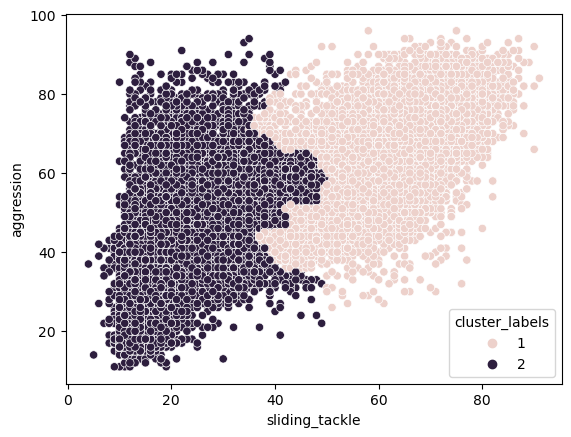

In [7]:
# Use the linkage() function to compute distances
Z = linkage(fifa, 'ward')

# Generate cluster labels
fifa['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')

# Plot the points with seaborn
sns.scatterplot(x=x, y=y, hue='cluster_labels', data=fifa)
plt.show()


In [8]:
goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)
print(scaled_data)


[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


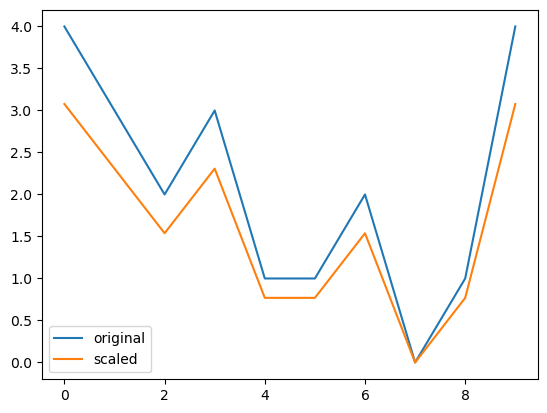

In [9]:
# Plot original data
plt.plot(goals_for, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

# Show the legend in the plot
plt.legend()

# Display the plot
plt.show()


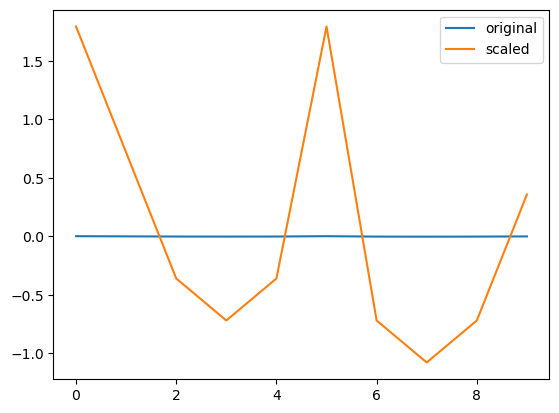

In [10]:
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()


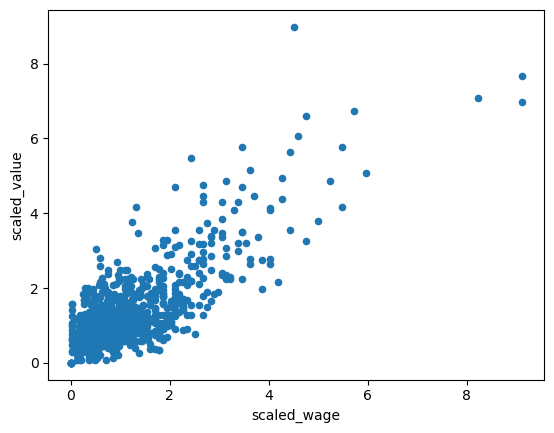

       scaled_wage  scaled_value
count  1000.000000   1000.000000
mean      1.119812      1.306272
std       1.000500      1.000500
min       0.000000      0.000000
25%       0.467717      0.730412
50%       0.854794      1.022576
75%       1.407184      1.542995
max       9.112425      8.984064


In [11]:
# Scale wage and value
fifa_18['scaled_wage'] = whiten(fifa_18['eur_wage'])
fifa_18['scaled_value'] = whiten(fifa_18['eur_value'])

# Plot the two columns in a scatter plot
fifa_18.plot(x='scaled_wage', y='scaled_value', kind = 'scatter')
plt.show()

# Check mean and standard deviation of scaled values
print(fifa_18[['scaled_wage', 'scaled_value']].describe())


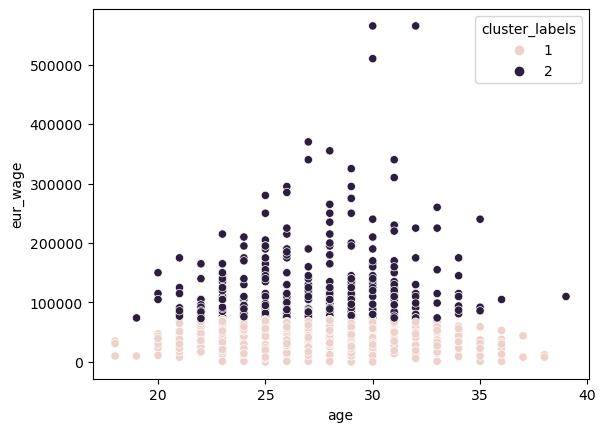

In [12]:
# Use the linkage() function
distance_matrix = linkage(fifa_18[['age', 'eur_wage']], method = 'ward', metric = 'euclidean')

# Assign cluster labels
fifa_18['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='age', y='eur_wage', 
                hue='cluster_labels', data = fifa_18)
plt.show()


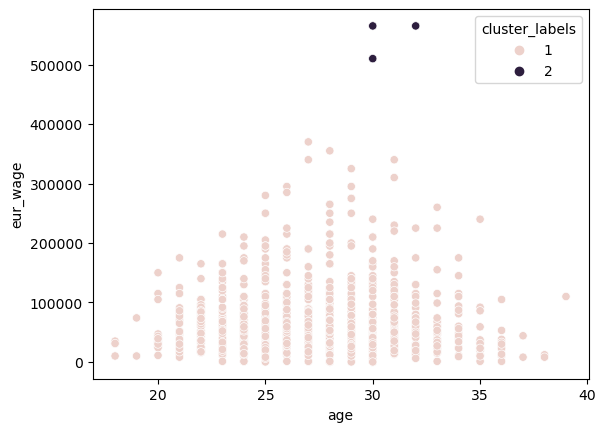

In [13]:
# Use the linkage() function
distance_matrix = linkage(fifa_18[['age', 'eur_wage']], method = 'single', metric = 'euclidean')

# Assign cluster labels
fifa_18['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='age', y='eur_wage', 
                hue='cluster_labels', data = fifa_18)
plt.show()


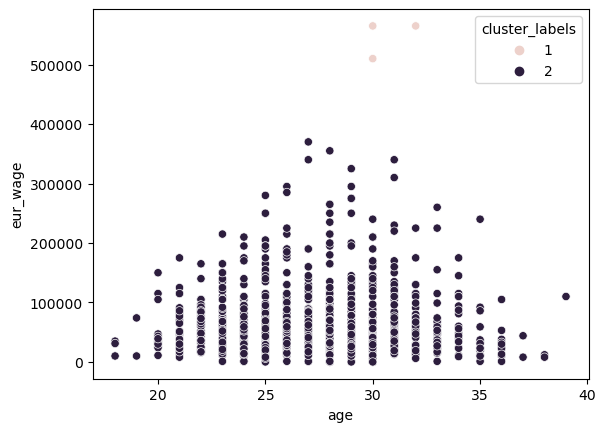

In [14]:
# Use the linkage() function
distance_matrix = linkage(fifa_18[['age', 'eur_wage']], method = 'complete', metric = 'euclidean')

# Assign cluster labels
fifa_18['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='age', y='eur_wage', 
                hue='cluster_labels', data = fifa_18)
plt.show()


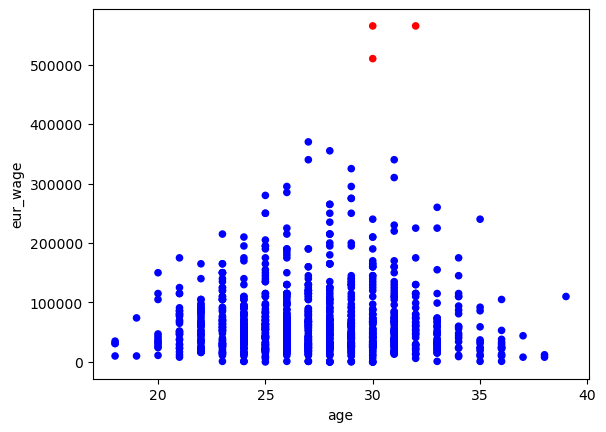

In [15]:
# Define a colors dictionary for clusters
colors = {1:'red', 2:'blue'}

# Plot a scatter plot
fifa_18.plot.scatter(x='age', 
                	   y='eur_wage',
                       c=fifa_18['cluster_labels'].apply(lambda x: colors[x]))
plt.show()


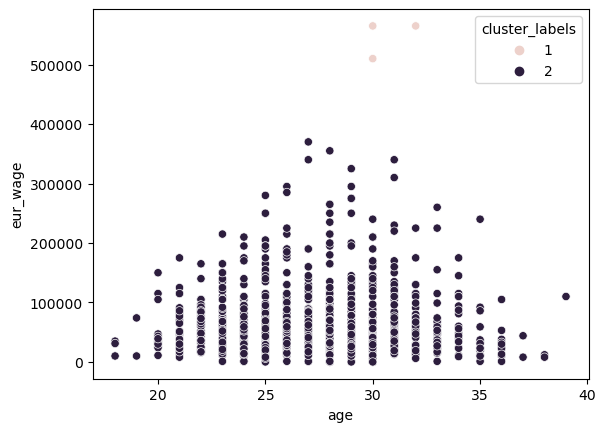

In [16]:
# Plot a scatter plot using seaborn
sns.scatterplot(x='age', 
                y='eur_wage', 
                hue='cluster_labels', 
                data=fifa_18)
plt.show()


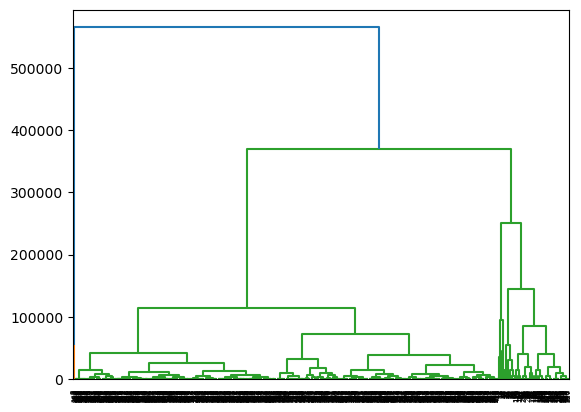

In [17]:
# Create a dendrogram
dn = dendrogram(distance_matrix)

# Display the dendogram
plt.show()


In [18]:
# Use the whiten() function to standardize the data
scaled_data = whiten(fifa[['sliding_tackle', 'aggression']])
print(scaled_data)


[[1.0709243  3.60925699]
 [1.21061008 2.74991009]
 [1.53654356 3.20822844]
 ...
 [0.65186696 1.48953463]
 [2.18841052 2.6353305 ]
 [2.00216282 2.97906926]]


                sliding_tackle  aggression
cluster_labels                            
1                    21.205578   32.276991
2                    64.719984   70.928728
3                    41.545851   56.044929


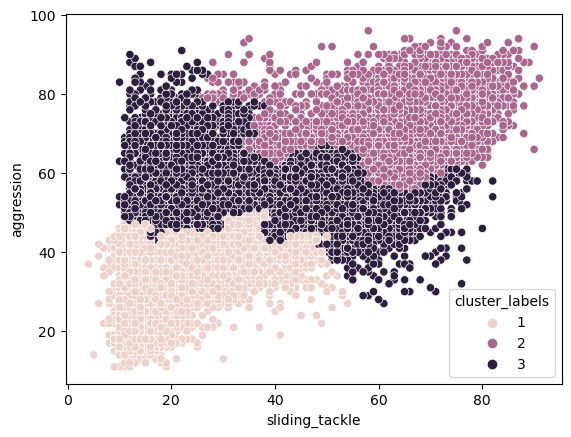

In [19]:
#nonstandardized data

# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(scaled_data, 'ward')

# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# Display cluster centers of each cluster
print(fifa[['sliding_tackle', 'aggression', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='sliding_tackle', y='aggression', hue='cluster_labels', data=fifa)
plt.show()


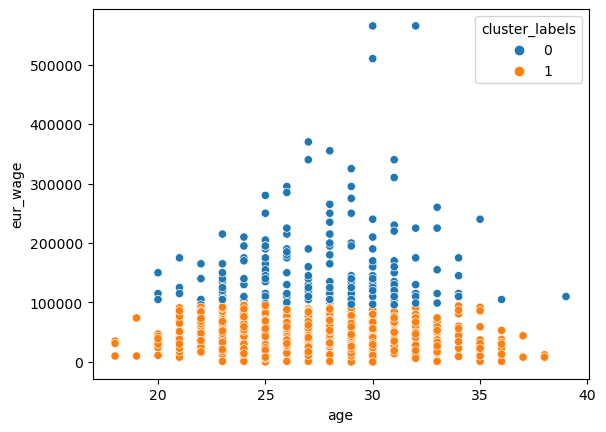

In [20]:
# Generate cluster centers
cluster_centers, distortion = kmeans(fifa_18[['age', 'eur_wage']], 2)

# Assign cluster labels
fifa_18['cluster_labels'], distortion_list = vq(fifa_18[['age', 'eur_wage']], cluster_centers)

# Plot clusters
sns.scatterplot(x='age', y='eur_wage', 
                hue='cluster_labels', data = fifa_18)
plt.show()


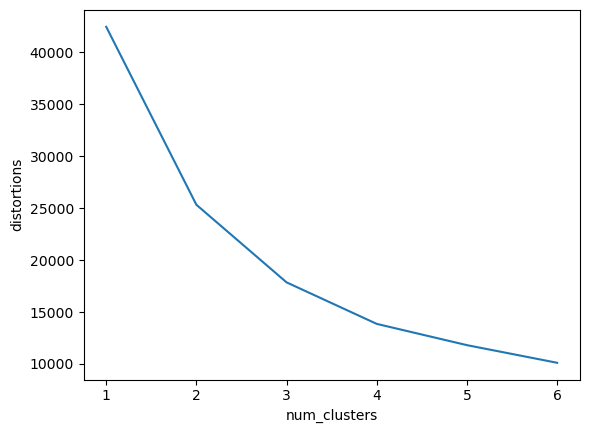

In [21]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(fifa_18[['age', 'eur_wage']], i)
    distortions.append(distortion)

# Create a DataFrame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()


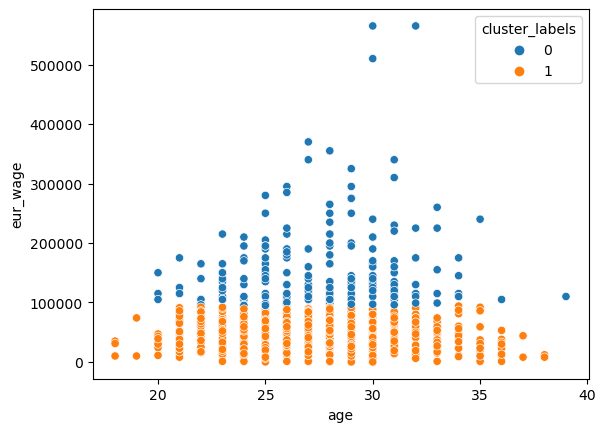

In [22]:
# Initialize seed
random.seed([1, 2, 1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(fifa_18[['age', 'eur_wage']], 2)
fifa_18['cluster_labels'], distortion_list = vq(fifa_18[['age', 'eur_wage']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='age', y='eur_wage', 
                hue='cluster_labels', data = fifa_18)
plt.show()


                      age       eur_wage
cluster_labels                          
0               27.519920   29350.597610
1               27.010390   82605.194805
2               27.575221  202610.619469


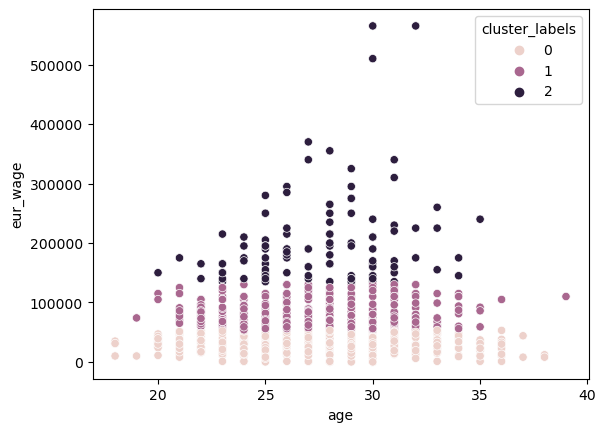

In [23]:
#nonstandardized data

# Set up a random seed in numpy
random.seed([1000,2000])

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa_18[['age', 'eur_wage']], 3)

# Assign cluster labels
fifa_18['cluster_labels'], _ = vq(fifa_18[['age', 'eur_wage']], cluster_centers)

# Display cluster centers 
print(fifa_18[['age', 'eur_wage', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='age', y='eur_wage', hue='cluster_labels', data=fifa_18)
plt.show()


In [24]:
# Print the size of the clusters
print(fifa_18.groupby('cluster_labels')['ID'].count())

# Print the mean value of wages in each cluster
print(fifa_18.groupby('cluster_labels')['eur_wage'].mean())


cluster_labels
0    502
1    385
2    113
Name: ID, dtype: int64
cluster_labels
0     29350.597610
1     82605.194805
2    202610.619469
Name: eur_wage, dtype: float64
